# SH 17
## Classes Encoding: 
* 0:  person
* 1:  ear
* 2:  ear-mufs
* 3:  face
* 4:  face-guard
* 5:  face-mask
* 6:  foot
* 7:  tool
* 8:  glasses
* 9:  gloves
* 10: helmet
* 11: hands
* 12: head
* 13: medical-suit
* 14: shoes
* 15: safety-suit
* 16: safety-vest

## Used Classes:
- glasses:	8
- gloves:	9
- helmet:	10
- shoes:	14
- safety-vest:	16 

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from collections import Counter

In [ ]:
images_folder = "./Synapsis/Challenge2/dataset/images"
labels_folder = './Synapsis/Challenge3/labels'

class_names = [
    'person', 'ear', 'ear-muff', 'face', 'face-guard', 'face-mask',
    'foot', 'tool', 'glasses', 'gloves', 'helmet', 'hands',
    'head', 'medical-suit', 'shoes', 'safety-suit', 'safety-vest'
]

In [27]:
label_counter = Counter()

In [28]:
for label_file in os.listdir(labels_folder):
    if not label_file.endswith('.txt'):
        continue

    label_path = os.path.join(labels_folder, label_file)
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        class_id = int(line.split()[0])
        label_counter[class_id] += 1

In [29]:
print("Summary Statistik Label Dataset:\n")
for class_id, count in sorted(label_counter.items()):
    print(f"{class_names[class_id]} (ID {class_id}): {count} objek")


Summary Statistik Label Dataset:

person (ID 0): 13802 objek
ear (ID 1): 7730 objek
ear-muff (ID 2): 318 objek
face (ID 3): 8950 objek
face-guard (ID 4): 134 objek
face-mask (ID 5): 670 objek
foot (ID 6): 759 objek
tool (ID 7): 4647 objek
glasses (ID 8): 1945 objek
gloves (ID 9): 2790 objek
helmet (ID 10): 927 objek
hands (ID 11): 15850 objek
head (ID 12): 11985 objek
medical-suit (ID 13): 157 objek
shoes (ID 14): 4560 objek
safety-suit (ID 15): 240 objek
safety-vest (ID 16): 530 objek


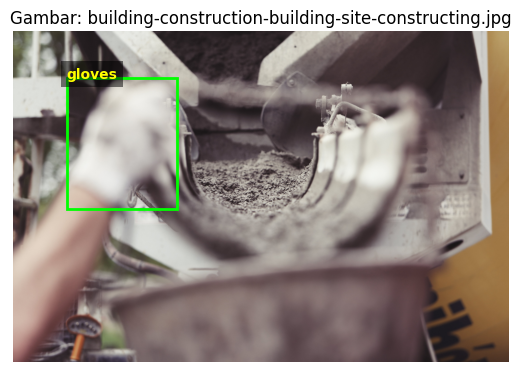

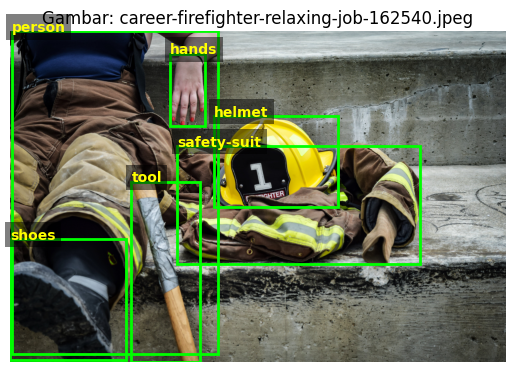

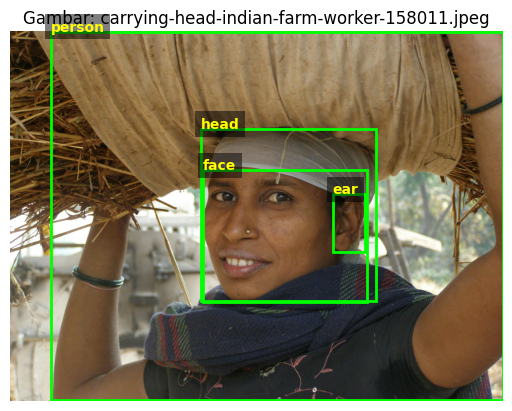

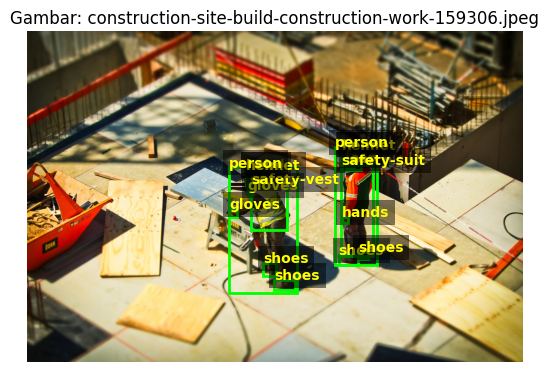

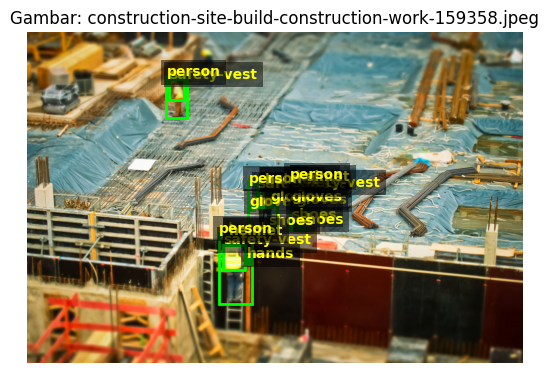

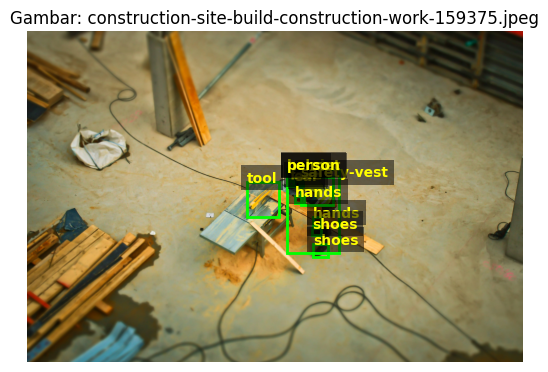

In [ ]:
sample_images = os.listdir(images_folder)
sample_images = [img for img in sample_images if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
sample_images = sample_images[:6] 

for img_name in sample_images:
    img_path = os.path.join(images_folder, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(labels_folder, label_name)

    if not os.path.exists(label_path):
        continue 

    img = mpimg.imread(img_path)
    height, width = img.shape[:2]

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Load dan gambar bounding box
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, w, h = map(float, parts[1:])

        # Konversi dari format YOLO ke koordinat gambar
        x = (x_center - w / 2) * width
        y = (y_center - h / 2) * height
        w = w * width
        h = h * height

        # Gambar bounding box
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)

        # Tampilkan label
        plt.text(x, y - 5, class_names[class_id], color='yellow', fontsize=10, weight='bold',
                 bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

    plt.title(f"Gambar: {img_name}")
    plt.axis('off')
    plt.show()
